# Set Up

In [2]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/Coronavirus_Updated.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#df.columns = ['IndexNumber','UID', 'code3', 'FIPS', 'Lat', 'Long', 'Population', 'State', 'Area', 'Date', 'Deaths', 'Area_MA', 'Area_MW', 'Area_NE', 'Area_O', 'Area_S', 'Area_SW', 'Area_W', 'NumberOfDays', 'Firstdeath', 'DaysSinceFirst', 'PopulationScaled', 'DeathsScaled']

In [4]:
df = df.loc[~df['State'].isin(['American Samoa','Northern Mariana Islands', 'Grand Princess', 'Diamond Princess', 'Guam', 'District of Columbia', 'Puerto Rico', 'Virgin Islands'])]

In [5]:
#area = ['S', 'W', 'SW', 'S', 'W', 'W', 'NE', 'MA', 'S', 'S', 'W', 'W', 'MW', 'MW', 'MW', 'MW', 'S', 'S', 'NE', 'MA', 'NE', 'MW', 'MW', 'S', 'MW', 'W', 'MW', 'W', 'NE', 'MA', 'SW', 'MA', 'S', 'MW', 'MW', 'SW', 'W', 'MA', 'NE', 'S', 'MW', 'S', 'SW', 'W', 'NE', 'S', 'W', 'S', 'MW', 'W']
#df['Area'] = area

In [6]:
import numpy as np

df.DaysSinceFirst = pd.to_numeric(df.DaysSinceFirst, errors='coerce').fillna(0).astype(np.int64)

In [7]:
df.DaysSinceFirst.dtype

dtype('int64')

In [8]:
df.tail(54)

,Unnamed: 0,IndexNumber,UID,code3,FIPS,Lat,Long,Population,State,Area,Date,Deaths,Area_MA,Area_MW,Area_NE,Area_O,Area_S,Area_SW,Area_W,NumberOfDays,Firstdeath,DaysSinceFirst,PopulationScaled,DeathsScaled,ClinicianCountper100k,ClinicianRate,CityPopulationDensity,MostDenseCity
8690,8690,8690,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-06-30,1332,0,0,0,0,0,0,1,160,2020-02-29,122,0.179723,0.158322,1261.0,17.03,3336.0,Seattle
8691,8691,8691,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-06-30,93,0,0,0,0,1,0,0,160,2020-03-30,92,-0.599051,-0.248653,741.0,40.81,3681.3,West Side
8692,8692,8692,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-06-30,784,0,1,0,0,0,0,0,160,2020-03-19,103,-0.060013,-0.021680,1056.0,18.22,2389.0,Milwaukee
8693,8693,8693,2101458641,21000,1458641.0,990.998367,-2464.524571,578759,Wyoming,W,2020-06-30,20,0,0,0,0,0,0,1,160,2020-04-13,78,-0.761338,-0.272631,123.0,21.23,862.0,Cheyenne
8694,8694,8694,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-07-01,972,0,0,0,0,1,0,0,161,2020-03-25,98,-0.182959,0.040073,555.0,11.39,2973.9,Normal
8695,8695,8695,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-07-01,14,0,0,0,0,0,0,1,161,2020-03-25,98,-0.740903,-0.274602,227.0,30.68,3458.4,Homesite Park
8696,8696,8696,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-07-01,1725,0,0,0,0,0,1,0,161,2020-03-21,102,0.134760,0.287411,1975.0,28.15,1212.0,Phoenix
8697,8697,8697,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-07-01,277,0,0,0,0,1,0,0,161,2020-03-24,99,-0.435123,-0.188214,333.0,11.08,643.0,Little Rock
8698,8698,8698,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-07-01,6169,0,0,0,0,0,0,1,161,2020-03-04,119,4.445890,1.747134,5338.0,13.50,7286.0,San Francisco
8699,8699,8699,5544685999,55440,685999.0,2491.870366,-6751.119357,5758736,Colorado,W,2020-07-01,1697,0,0,0,0,0,0,1,161,2020-03-12,111,-0.068532,0.278214,1534.0,27.36,1774.0,Denver


In [9]:
df.FirstDays = 0
df.loc[(df['DaysSinceFirst']<16) & (df['DaysSinceFirst']>0), 'FirstDays'] = 1
df.MiddleDays = 0
df.loc[(df['DaysSinceFirst']<60) & (df['DaysSinceFirst']>=16), 'MiddleDays'] = 1
df.LastDays = 0
df.loc[df['DaysSinceFirst']>=60, 'LastDays'] = 1


In [10]:
df['FirstWorld'] = df.FirstDays * df.DaysSinceFirst 
df['MiddleWorld'] = df.MiddleDays * df.DaysSinceFirst 
df['LastWorld'] = df.LastDays * df.DaysSinceFirst

In [11]:
df.head(5)

,Unnamed: 0,IndexNumber,UID,code3,FIPS,Lat,Long,Population,State,Area,Date,Deaths,Area_MA,Area_MW,Area_NE,Area_O,Area_S,Area_SW,Area_W,NumberOfDays,Firstdeath,DaysSinceFirst,PopulationScaled,DeathsScaled,ClinicianCountper100k,ClinicianRate,CityPopulationDensity,MostDenseCity,FirstDays,MiddleDays,LastDays,FirstWorld,MiddleWorld,LastWorld
0,0,0,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,Alabama,S,2020-01-22,0,0,0,0,0,1,0,0,0,2020-03-25,-63,-0.182959,-0.2792,555.0,11.39,2973.9,Normal,NaN,NaN,NaN,0,0,0
1,1,1,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,Alaska,W,2020-01-22,0,0,0,0,0,0,0,1,0,2020-03-25,-63,-0.740903,-0.2792,227.0,30.68,3458.4,Homesite Park,NaN,NaN,NaN,0,0,0
2,2,2,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,Arizona,SW,2020-01-22,0,0,0,0,0,0,1,0,0,2020-03-21,-59,0.134760,-0.2792,1975.0,28.15,1212.0,Phoenix,NaN,NaN,NaN,0,0,0
3,3,3,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,Arkansas,S,2020-01-22,0,0,0,0,0,1,0,0,0,2020-03-24,-62,-0.435123,-0.2792,333.0,11.08,643.0,Little Rock,NaN,NaN,NaN,0,0,0
4,4,4,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,California,W,2020-01-22,0,0,0,0,0,0,0,1,0,2020-03-04,-42,4.445890,-0.2792,5338.0,13.50,7286.0,San Francisco,NaN,NaN,NaN,0,0,0


df.FirstWorld = df.FirstDays * df.DaysSinceFirst
df.MiddleWorld = df.MiddleDays * df.DaysSinceFirst
df.LastWorld = df.LastDays * df.DaysSinceFirst

# Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
scaled = scaler.fit_transform(df[['DaysSinceFirst']])
 
 
df_scaled = pd.DataFrame(data=scaled, columns=['DaysSinceFirstScaled'])
 
df = df.join(df_scaled)

df.tail()

,Unnamed: 0,IndexNumber,UID,code3,FIPS,Lat,Long,Population,State,Area,Date,Deaths,Area_MA,Area_MW,Area_NE,Area_O,Area_S,Area_SW,Area_W,NumberOfDays,Firstdeath,DaysSinceFirst,PopulationScaled,DeathsScaled,ClinicianCountper100k,ClinicianRate,CityPopulationDensity,MostDenseCity,FirstDays,MiddleDays,LastDays,FirstWorld,MiddleWorld,LastWorld,DaysSinceFirstScaled
8743,8743,8743,11346988213,113400,6988213.0,4996.297993,-10442.323661,8535519,Virginia,S,2020-07-01,1786,0,0,0,0,1,0,0,161,2020-03-14,109,0.302854,0.307448,1249.0,14.75,1463.0,Richmond,NaN,NaN,1.0,0,0,0,NaN
8744,8744,8744,3446238627,34440,2238627.0,1842.117670,-4708.049596,7614893,Washington,W,2020-07-01,1339,0,0,0,0,0,0,1,161,2020-02-29,123,0.179723,0.160622,1261.0,17.03,3336.0,Seattle,NaN,NaN,1.0,0,0,0,NaN
8745,8745,8745,4791143133,47880,3143133.0,2134.783954,-4433.959998,1792147,West Virginia,S,2020-07-01,93,0,0,0,0,1,0,0,161,2020-03-30,93,-0.599051,-0.248653,741.0,40.81,3681.3,West Side,NaN,NaN,1.0,0,0,0,NaN
8746,8746,8746,6220135229,62160,4135229.0,3196.450332,-6465.454559,5822434,Wisconsin,MW,2020-07-01,786,0,1,0,0,0,0,0,161,2020-03-19,104,-0.060013,-0.021023,1056.0,18.22,2389.0,Milwaukee,NaN,NaN,1.0,0,0,0,NaN
8747,8747,8747,2101458641,21000,1458641.0,990.998367,-2464.524571,578759,Wyoming,W,2020-07-01,20,0,0,0,0,0,0,1,161,2020-04-13,79,-0.761338,-0.272631,123.0,21.23,862.0,Cheyenne,NaN,NaN,1.0,0,0,0,NaN


# Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()
 
X = df[['PopulationScaled']]
y = df['DeathsScaled']

# Clustering using KMeans

In [14]:
from sklearn.cluster import KMeans
 
X = df[['DaysSinceFirst','PopulationScaled', 'Lat', 'Long']]
 
kmeans = KMeans(n_clusters = 5)
df['kmeans_clusters'] = kmeans.fit_predict(X)


In [15]:
kmeans = KMeans(n_clusters = 5)
df['kmeans_clusters'] = kmeans.fit_predict(X)
df[['DaysSinceFirst','PopulationScaled','kmeans_clusters', 'Lat', 'Long']]
df['kmeans_clusters'].value_counts()

2    2268
0    2268
4    2106
1    1296
3     162
Name: kmeans_clusters, dtype: int64

In [16]:
pd.crosstab(df.kmeans_clusters, df.DeathsScaled).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked=True)

Output hidden; open in https://colab.research.google.com to view.

# ModelEvaluation

In [17]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


X = df[['DaysSinceFirst','PopulationScaled', 'FirstWorld', 'MiddleWorld', 'LastWorld', 'ClinicianCountper100k',	'ClinicianRate', 'CityPopulationDensity', 'Area_MA',	'Area_MW', 'Area_NE',	'Area_S',	'Area_SW', 'Area_W']]  
y = df['Deaths']
 
cv = TimeSeriesSplit(n_splits = int(len(df)/54))

In [18]:
for i in list(X):
  print(i)
  print(len(X.loc[X[i].isnull()]))

DaysSinceFirst
0
PopulationScaled
0
FirstWorld
0
MiddleWorld
0
LastWorld
0
ClinicianCountper100k
0
ClinicianRate
0
CityPopulationDensity
0
Area_MA
0
Area_MW
0
Area_NE
0
Area_S
0
Area_SW
0
Area_W
0


In [19]:
df.loc[df['ClinicianCountper100k'].isnull()]

,Unnamed: 0,IndexNumber,UID,code3,FIPS,Lat,Long,Population,State,Area,Date,Deaths,Area_MA,Area_MW,Area_NE,Area_O,Area_S,Area_SW,Area_W,NumberOfDays,Firstdeath,DaysSinceFirst,PopulationScaled,DeathsScaled,ClinicianCountper100k,ClinicianRate,CityPopulationDensity,MostDenseCity,FirstDays,MiddleDays,LastDays,FirstWorld,MiddleWorld,LastWorld,DaysSinceFirstScaled,kmeans_clusters


# Sequential Feature Selection


In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [21]:
from sklearn.linear_model import LinearRegression
 
LR=LinearRegression()

In [22]:
sfs = SFS(LR, 
          k_features = 14,
          scoring = 'neg_mean_squared_error',
          cv=cv)
sfs = sfs.fit(X, y)
sfs.get_metric_dict()

{1: {'avg_score': -7166978.910261464,
  'ci_bound': 1226379.8679107022,
  'cv_scores': array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         -0.00000000e+00, -1.88679245e-02, -1.88487592e-02, -6.79019299e-01,
         -9.42239985e-01, -1.90257164e+00, -2.29639213e+00, -3.19856154e+00,
         -4.90833423e+00, -6.18394596e+00, -6.92983030e+00, -1.03597031e+01,
         -1.12793236e+01, -1.86301177e+01, -2.65630605e+01, -3.12528

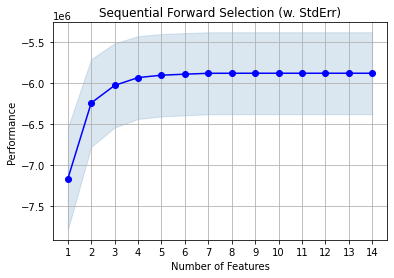

In [23]:
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [24]:
import numpy as np
np.sqrt(np.abs(-5881340.053025547))

2425.1474291319996

# Error

In [25]:
X = df[['DaysSinceFirst','PopulationScaled', 'FirstWorld', 'MiddleWorld', 'LastWorld', 'ClinicianCountper100k',	'ClinicianRate', 'CityPopulationDensity', 'Area_MA',	'Area_MW', 'Area_NE',	'Area_S',	'Area_SW', 'Area_W']]  
y = df['Deaths']

df.prediction = LR.predict(X)
df['error2'] = np.abs(y - df.prediction)
import seaborn as sns
sns.scatterplot(x = 'DaysSinceFirst', y = 'error2', data = df)

NotFittedError: ignored

1. create temp data frame that contains all observations where dayssincefirst > 20
2. take average of the error 2 variable (in EDA day 1)


In [ ]:
df['ErrorPercent'] = df.error2 / y
sns.scatterplot(x = 'DaysSinceFirst', y = 'ErrorPercent', data = df)

In [ ]:
df.ErrorPercent.mean()

In [ ]:
regularerror = df.loc[df['DaysSinceFirst'] > 22]

In [ ]:
regularerror.error2.mean()

# COVID Death Count Prediction Analysis using Linear Regression


In [ ]:
df['DeathsSquared'] = df.Deaths **2
df['DeathsSquared']

In [ ]:
import seaborn as sn
sn.scatterplot(x = 'DaysSinceFirst', y = 'DeathsSquared', data = df)

In [ ]:
df['LogDaysSinceFirst'] = np.log(df.DaysSinceFirst)

In [ ]:
import seaborn as sn
sn.scatterplot(x = 'DaysSinceFirst', y = 'Deaths', data = df)

In [ ]:
df['CbrtDaysSinceFirst'] = df.DaysSinceFirst
sn.scatterplot(x = 'CbrtDaysSinceFirst', y = 'Deaths', data = df)

In [ ]:
df.FirstDays = 0
df.loc[(df['DaysSinceFirst']<16) & (df['DaysSinceFirst']>0), 'FirstDays'] = 1
df.MiddleDays = 0
df.loc[(df['DaysSinceFirst']<60) & (df['DaysSinceFirst']>=16), 'MiddleDays'] = 1
df.LastDays = 0
df.loc[df['DaysSinceFirst']>=60, 'LastDays'] = 1


In [ ]:
df.FirstWorld = df.FirstDays * df.DaysSinceFirst
df.MiddleWorld = df.MiddleDays * df.DaysSinceFirst
df.LastWorld = df.LastDays * df.DaysSinceFirst

In [27]:
LR=LinearRegression()

df = df.loc[df.DaysSinceFirst >= 0]

y = df['Deaths']

X = df[['DaysSinceFirst','PopulationScaled', 'FirstWorld', 'MiddleWorld', 'LastWorld', 'ClinicianCountper100k',	'ClinicianRate', 'CityPopulationDensity', 'Area_MA',	'Area_MW', 'Area_NE',	'Area_S',	'Area_SW', 'Area_W']] 

LR.fit(X, y)
df['prediction'] = LR.predict(X)
df[['Deaths', 'prediction']].head(50)

,Deaths,prediction
2102,1,-1243.891292
2156,1,-1212.260790
2210,6,-1180.630288
2264,7,-1148.999786
2272,1,3381.384282
2318,10,-1117.369284
2326,1,3413.014784
2372,11,-1085.738783
2380,1,3444.645286
2426,13,-1054.108281


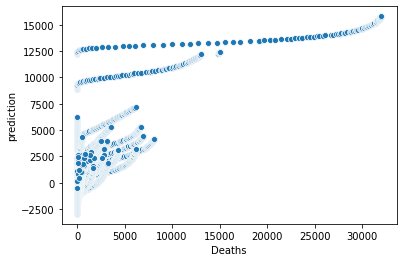

In [31]:
import seaborn as sn
sn.scatterplot(x = 'Deaths', y = 'prediction', data = df)

# Future

In [28]:
future = df.loc[df.NumberOfDays == 140]
otherdate = future.iloc[0]['Date']
future['DaysSinceFirst'] = (pd.to_datetime('7/2/2020') - pd.to_datetime(future.Firstdeath)).dt.days
future['DaysSinceFirst']
future['Date'] = '7/2/2020'
for date in pd.date_range(start='7/3/2020', end='1/1/2021'):
  future2 = df.loc[df.NumberOfDays == 140]
  otherdate = future2.iloc[0]['Date']
  future2['DaysSinceFirst'] = (date - pd.to_datetime(future2.Firstdeath)).dt.days
  future2['DaysSinceFirst']
  future2['Date'] = date
  future = future.append(future2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
future.tail(20)

In [29]:
X = future[['DaysSinceFirst','PopulationScaled', 'FirstWorld', 'MiddleWorld', 'LastWorld', 'ClinicianCountper100k',	'ClinicianRate', 'CityPopulationDensity', 'Area_MA',	'Area_MW', 'Area_NE',	'Area_S',	'Area_SW', 'Area_W']] 

future['prediction'] = LR.predict(X)
future[['State', 'prediction']].head(54)

,State,prediction
7560,Alabama,2334.590494
7561,Alaska,1122.078966
7562,Arizona,1596.462401
7563,Arkansas,1280.555410
7564,California,7177.044511
7565,Colorado,1455.602247
7566,Connecticut,3165.673902
7567,Delaware,4374.478519
7569,Florida,5329.825885
7570,Georgia,2660.272125


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

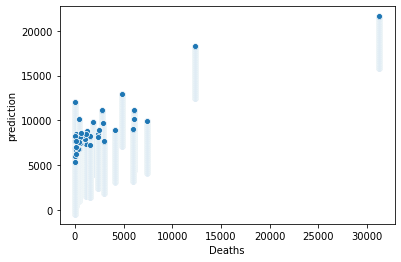

In [30]:
import seaborn as sn
sn.scatterplot(x = 'Deaths', y = 'prediction', data = future)
state = 'Wyoming'
tempdf = future.loc[future['State'] == state]

sns.scatterplot(x = 'DaysSinceFirst', y = 'prediction', hue = 'State', data = future)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [32]:
sns.scatterplot(x = 'Deaths', y = 'prediction', hue = 'State', data = future)
sns.set(rc={'figure.figsize':(11.7,8.27)})

NameError: ignored

In [33]:
np.round(LR.coef_)

array([   32.,   619.,     0.,     0.,    -0.,     0.,   -10.,     0.,
        1153.,   254.,   346.,  -195.,  -537., -1020.])

# USE APPEND TO COMBINE DF AND FUTURE DATA SETS

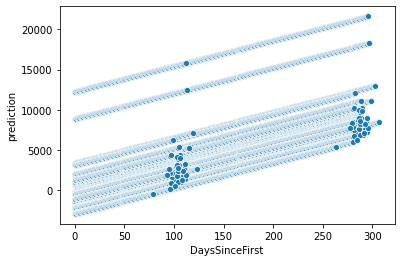

In [36]:
alltime = future.append(df)
state = 'New York'
alltimestate = alltime.loc[alltime['State'] == state]
sn.scatterplot(x = 'DaysSinceFirst', y = 'prediction', data = alltime)